In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os

pd.set_option('display.max_columns', 200) # to display all the columns
pd.set_option('display.max_rows',150) # to display all rows of df series
#pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific notations

import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
filename = "application_data.csv"
num_lines = sum(1 for i in open(filename))
size = num_lines//2
random.seed(10)
skip_id = random.sample(range(1, num_lines), num_lines-size)
df_app = pd.read_csv(filename, skiprows = skip_id) # reducing data size

In [3]:
df_app.shape

(153755, 122)

In [4]:
def column_wise_null_percentage(df):
    output = round(df.isnull().sum()/len(df.index)*100,2)
    return output
NA_col = column_wise_null_percentage(df_app)
NA_col

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.43
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.98
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [5]:
NA_col_50 = NA_col[NA_col>50] #drops columns with more then 50% null values
df_app = df_app.drop(NA_col_50.index, axis =1)
df_app.shape

(153755, 81)

In [6]:
NA_col=NA_col[NA_col>0]
NA_col_15 = NA_col[NA_col<15]
NA_col_15 # 0-15% null values

AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.43
EXT_SOURCE_2                   0.21
OBS_30_CNT_SOCIAL_CIRCLE       0.35
DEF_30_CNT_SOCIAL_CIRCLE       0.35
OBS_60_CNT_SOCIAL_CIRCLE       0.35
DEF_60_CNT_SOCIAL_CIRCLE       0.35
AMT_REQ_CREDIT_BUREAU_HOUR    13.32
AMT_REQ_CREDIT_BUREAU_DAY     13.32
AMT_REQ_CREDIT_BUREAU_WEEK    13.32
AMT_REQ_CREDIT_BUREAU_MON     13.32
AMT_REQ_CREDIT_BUREAU_QRT     13.32
AMT_REQ_CREDIT_BUREAU_YEAR    13.32
dtype: float64

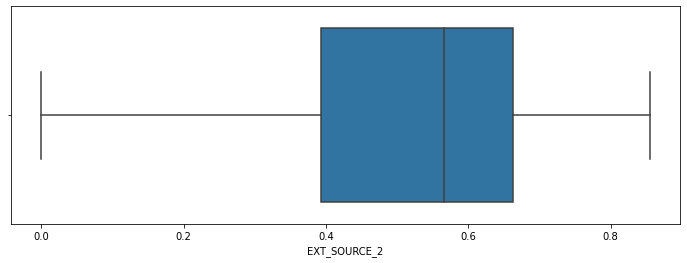

In [7]:
plt.figure(figsize=(12,4))
sns.boxplot(df_app['EXT_SOURCE_2'])
plt.show()

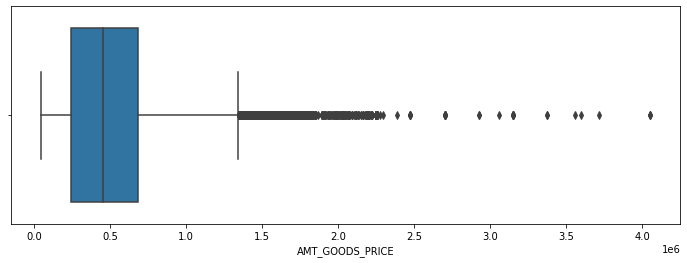

In [8]:
plt.figure(figsize=(12,4))
sns.boxplot(df_app['AMT_GOODS_PRICE'])
plt.show()

For 'EXT_SOURCE_2' there are no outliers present. And there is no significant diffence observed between mean and median. However data looks to be right skewed.
For 'AMT_GOODS_PRICE' there is significant number of outliers present in the data.

In [9]:
unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

df_app.drop(labels=unwanted,axis=1,inplace=True)

In [10]:
df_app.shape

(153755, 42)

In [11]:
# Dropping the rows having 'XNA' values
df_app = df_app.drop(df_app.loc[df_app['CODE_GENDER']=='XNA'].index)
df_app = df_app.drop(df_app.loc[df_app['ORGANIZATION_TYPE']=='XNA'].index)

In [12]:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE',
                 'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
                 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                'DAYS_LAST_PHONE_CHANGE']

df_app[numeric_columns]=df_app[numeric_columns].apply(pd.to_numeric)
df_app.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
3,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,Accountants,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
4,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,Core staff,SATURDAY,15,0,0,0,0,0,0,Medicine,0.0,0.0,0.0,0.0,-844.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
df_app['DAYS_BIRTH'] = df_app['DAYS_BIRTH'].abs()
df_app['DAYS_EMPLOYED'] = df_app['DAYS_EMPLOYED'].abs()
df_app['DAYS_REGISTRATION'] = df_app['DAYS_REGISTRATION'].abs()
df_app['DAYS_ID_PUBLISH'] = df_app['DAYS_ID_PUBLISH'].abs()
df_app['DAYS_LAST_PHONE_CHANGE'] = df_app['DAYS_LAST_PHONE_CHANGE'].abs()

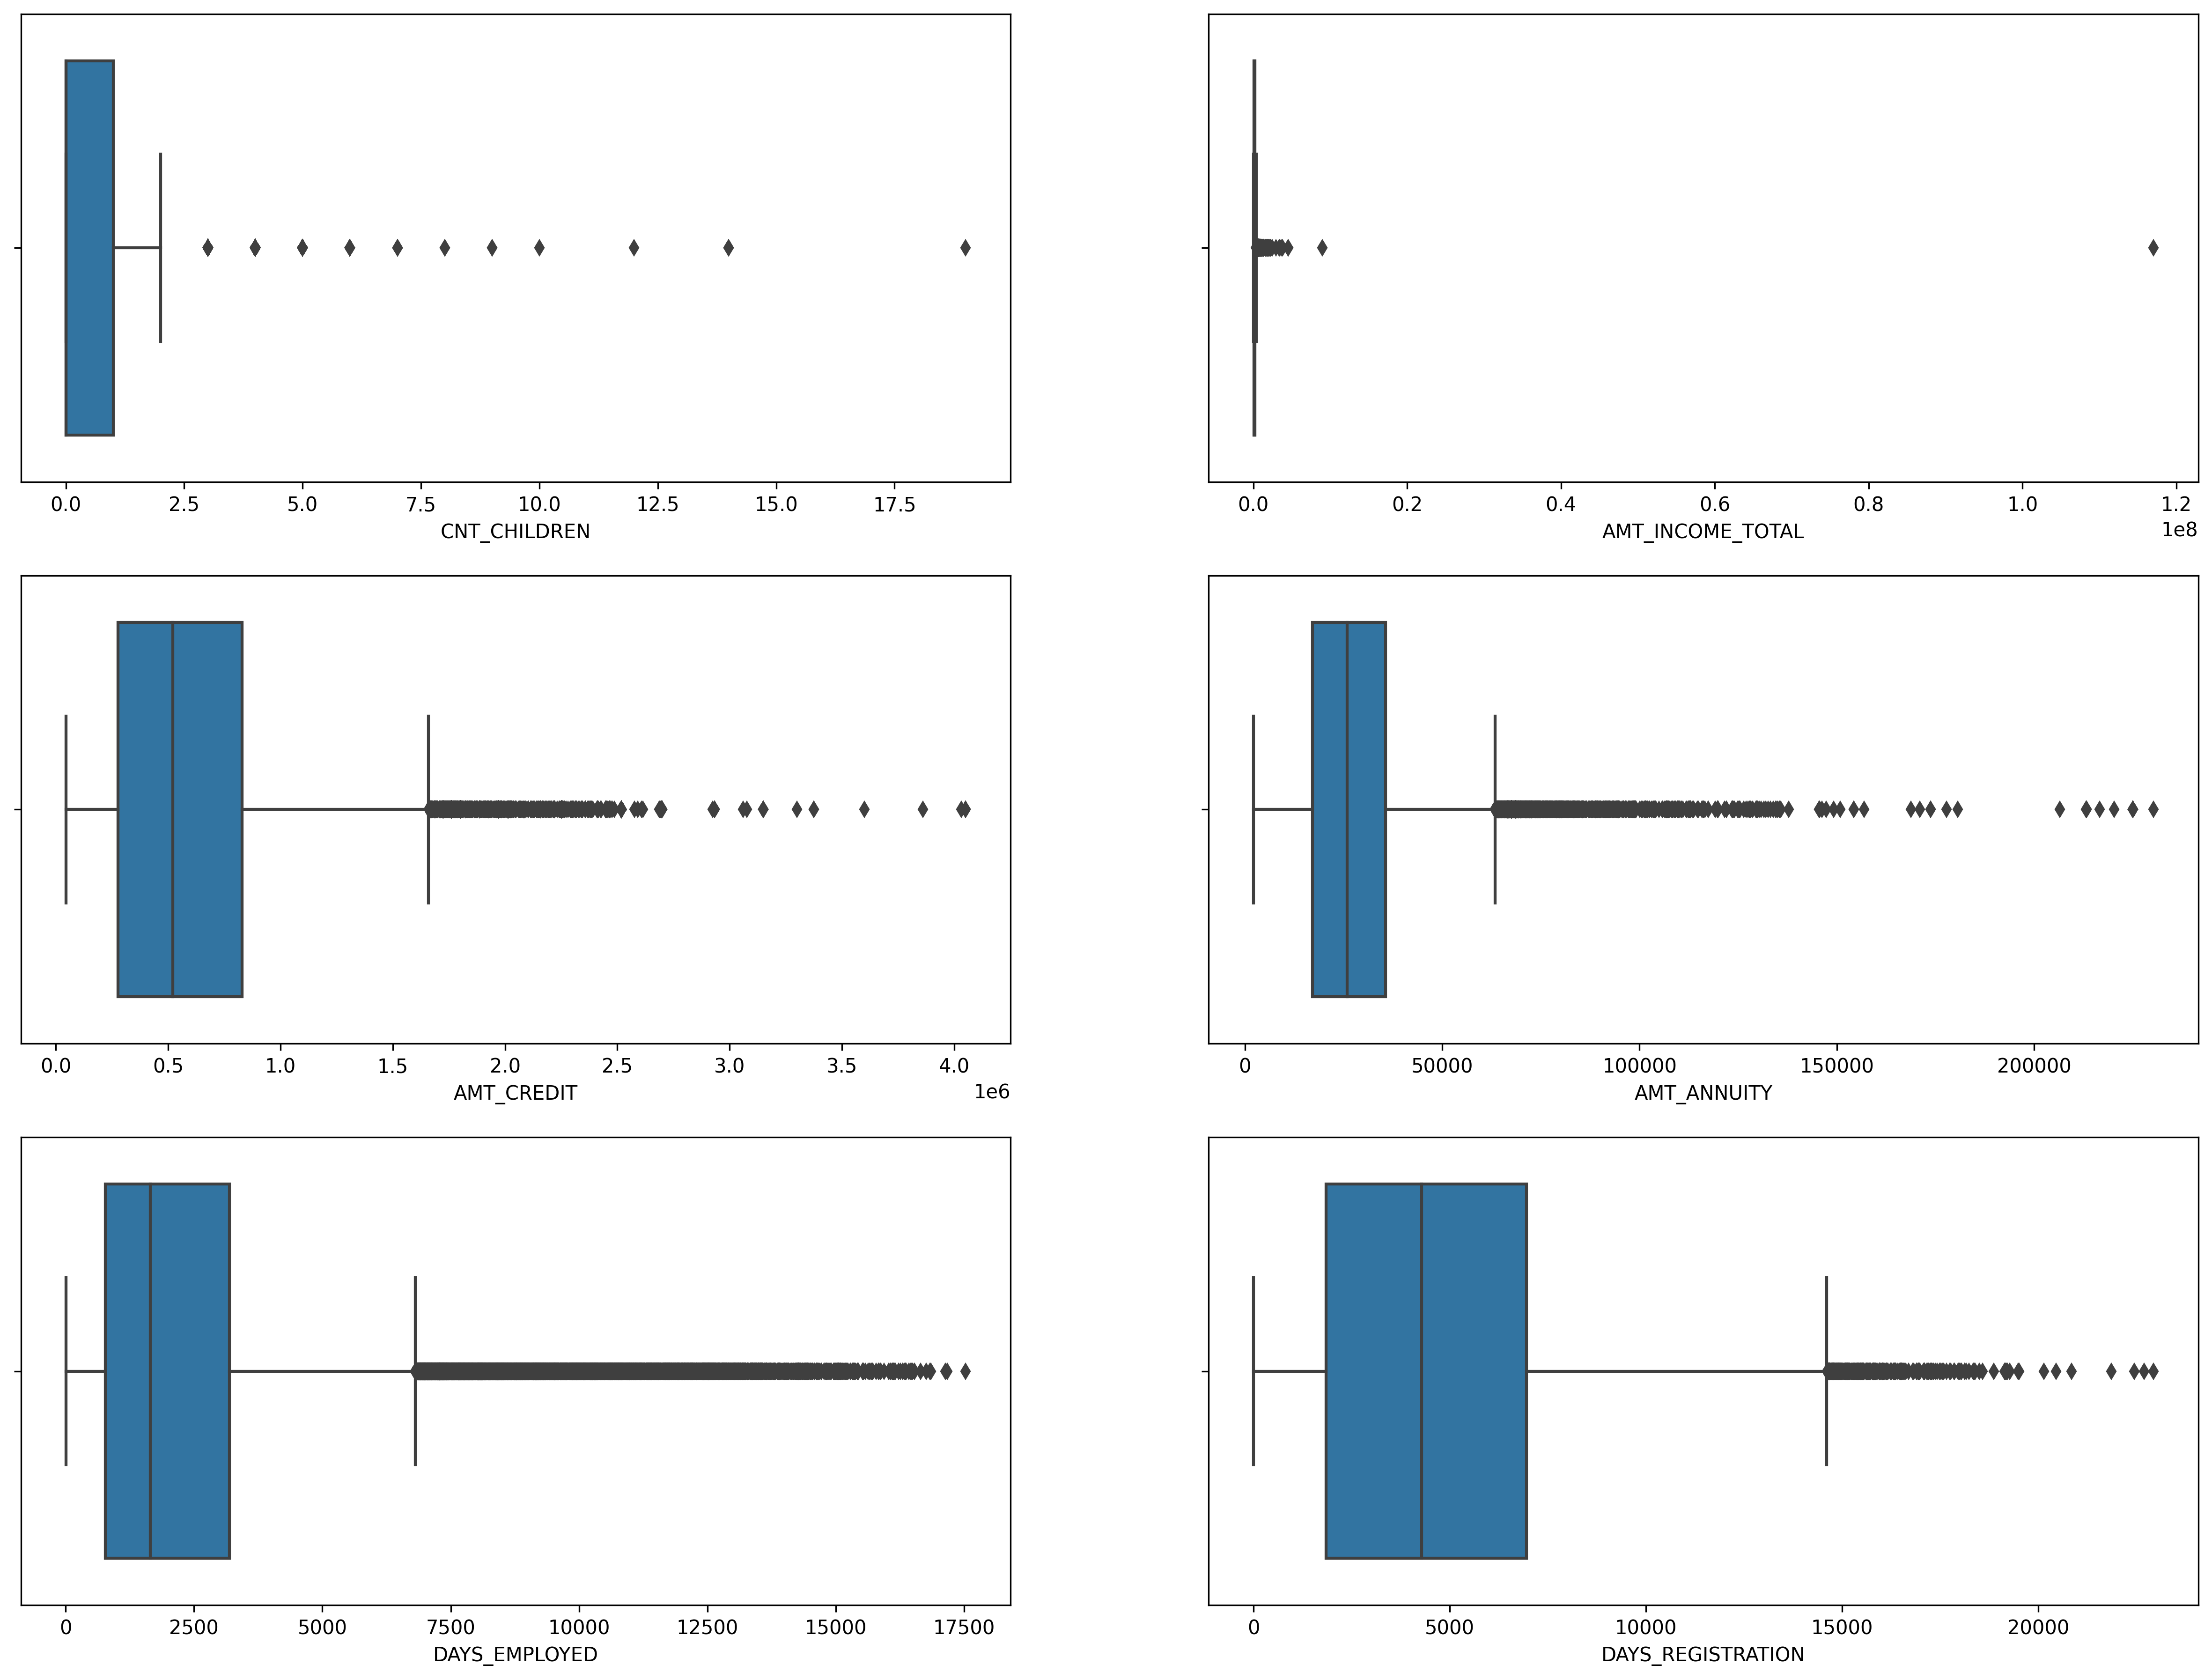

In [14]:
features = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED', 'DAYS_REGISTRATION']

plt.figure(figsize = (20, 15), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = df_app)
plt.show()

In [15]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

df_app['AMT_INCOME_RANGE']=pd.cut(df_app['AMT_INCOME_TOTAL'],bins,labels=slot)

bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,10000000000]
slot = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000-600000',
        '600000-700000','700000-800000','850000-900000','900000 and above']

df_app['AMT_CREDIT_RANGE']=pd.cut(df_app['AMT_CREDIT'],bins,labels=slot)

In [16]:
target0_df=df_app.loc[df_app["TARGET"]==0]
target1_df=df_app.loc[df_app["TARGET"]==1]
percentage_defaulters= round(100*len(target1_df)/(len(target0_df)+len(target1_df)),2)
percentage_defaulters

8.6

In [17]:
percentage_nondefaulters=round(100*len(target0_df)/(len(target0_df)+len(target1_df)),2)
percentage_nondefaulters

91.4

In [18]:
imb_ratio = round(len(target0_df)/len(target1_df),2)
imb_ratio

10.63

In [19]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titlepad'] = 14
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        
    plt.show()

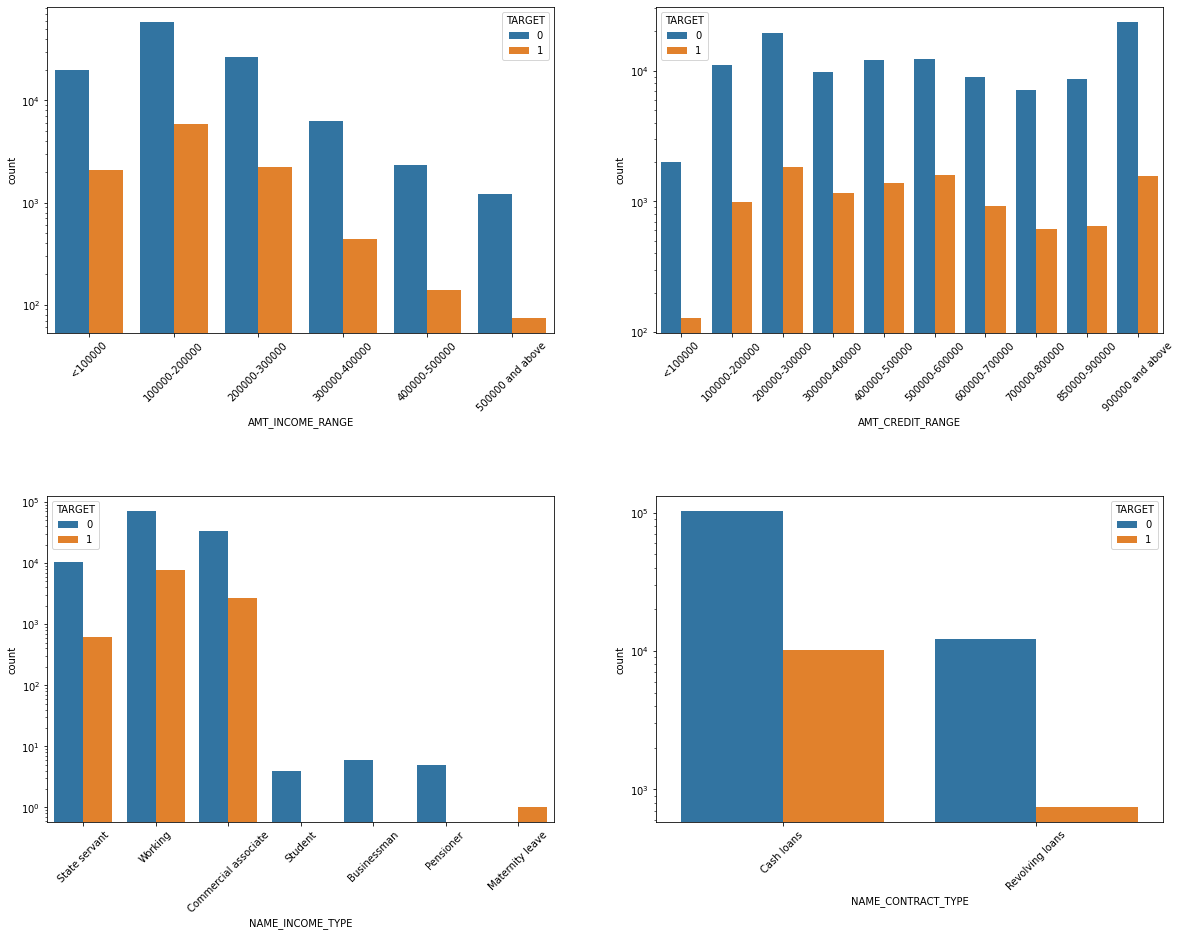

In [20]:
features = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE','NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
plt.figure(figsize = (20, 15))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_app)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 45)
    plt.yscale('log')

AMT_INCOME_RANGE :
The people between 100000-200000 have higher number of loans and also have higher defaulters
The income segment having >500000 are having less defaulters.

AMT_CREDIT_RANGE:
The people having <100000 loan have less defaulters.
income having more thatn >100000 have almost equal % of loan defaulters.

NAME_INCOME_TYPE:
Student pensioner and business have higher percentage of loan repayment.
Working, State servent and Commercial associates have higher default percentage.
Maternity category has significantly higher problems in repayement.

NAME_CONTRACT_TYPE:
For contract type ‘cash loans’ has higher number of credits than ‘Revolving loans’ contract type.
From the above graphs we can see that the Revolving loans are small amount compared to Cash loans but the % of non payment for the revolving loans are comparatively high.

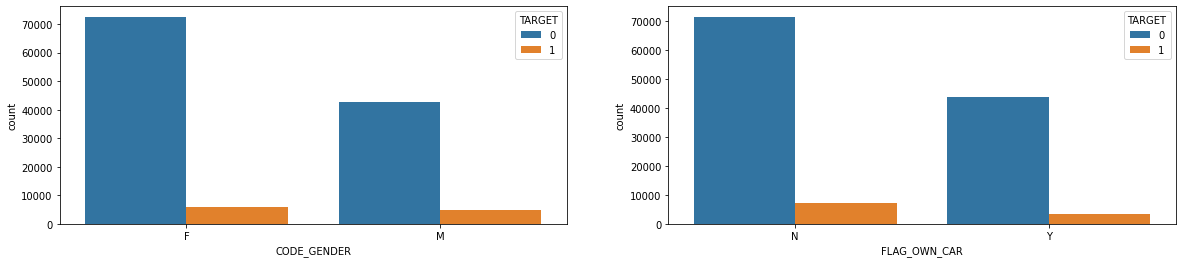

In [21]:
features = ['CODE_GENDER','FLAG_OWN_CAR']
plt.figure(figsize = (20, 10))

for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = df_app)
     
    plt.rcParams['axes.titlesize'] = 16

CODE_GENDER:
The % of defaulters are more in Male than Female
FLAG_OWN_CAR:
The people owning cars have higher percentage of defaulters.

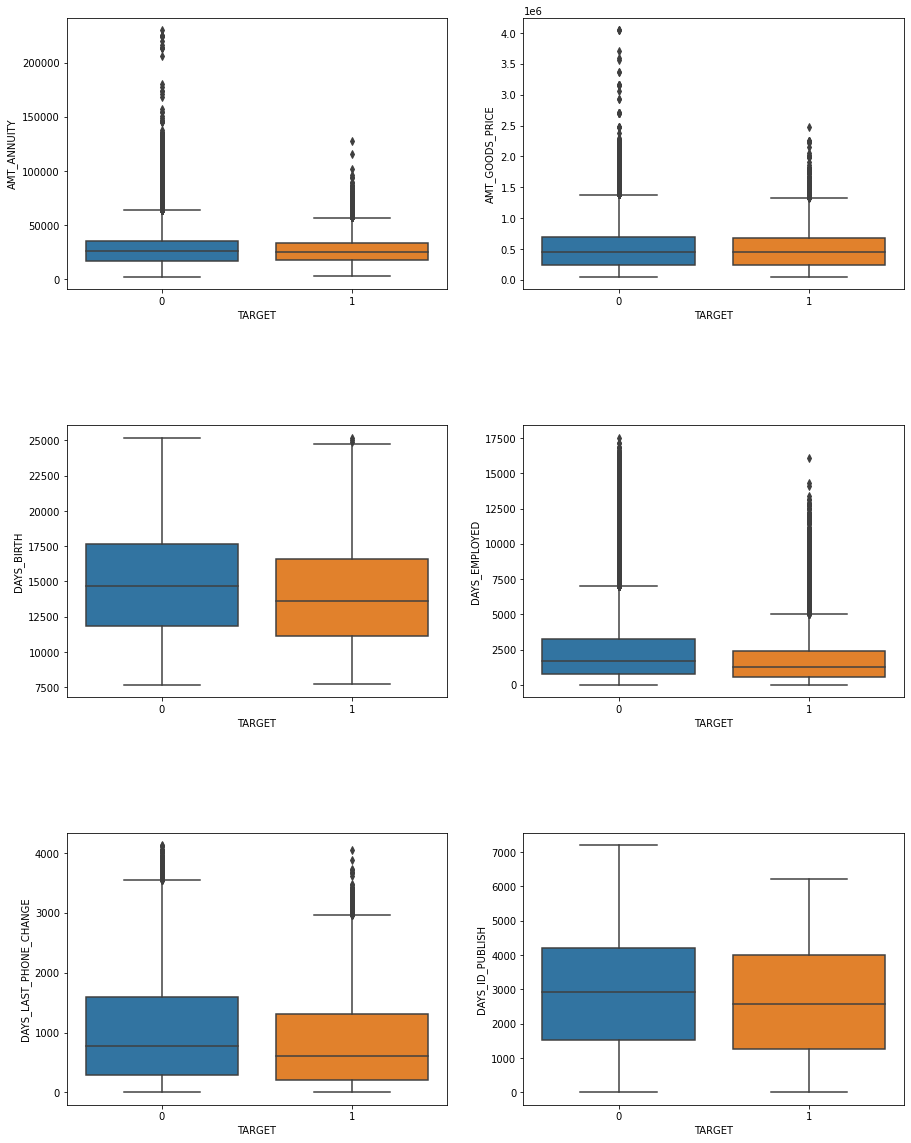

In [22]:
features = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH']
plt.figure(figsize = (15, 20))

for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x = 'TARGET', y = i[1], data = df_app)

Days_Birth: The people having higher age have higher probability of repayment.

Some outliers are observed in In 'AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', DAYS_LAST_PHONE_CHANGE in the dataset.
Less outlier observed in Days_Birth and DAYS_ID_PUBLISH

1st quartile is smaller than third quartile in In 'AMT_ANNUITY','AMT_GOODS_PRICE', DAYS_LAST_PHONE_CHANGE.
In DAYS_ID_PUBLISH: people changing ID in recent days are relativelty prone to be default.

There is single high value data point as outlier present in DAYS_EMPLOYED. Removal of this point will drastically impact the box plot for further analysis.

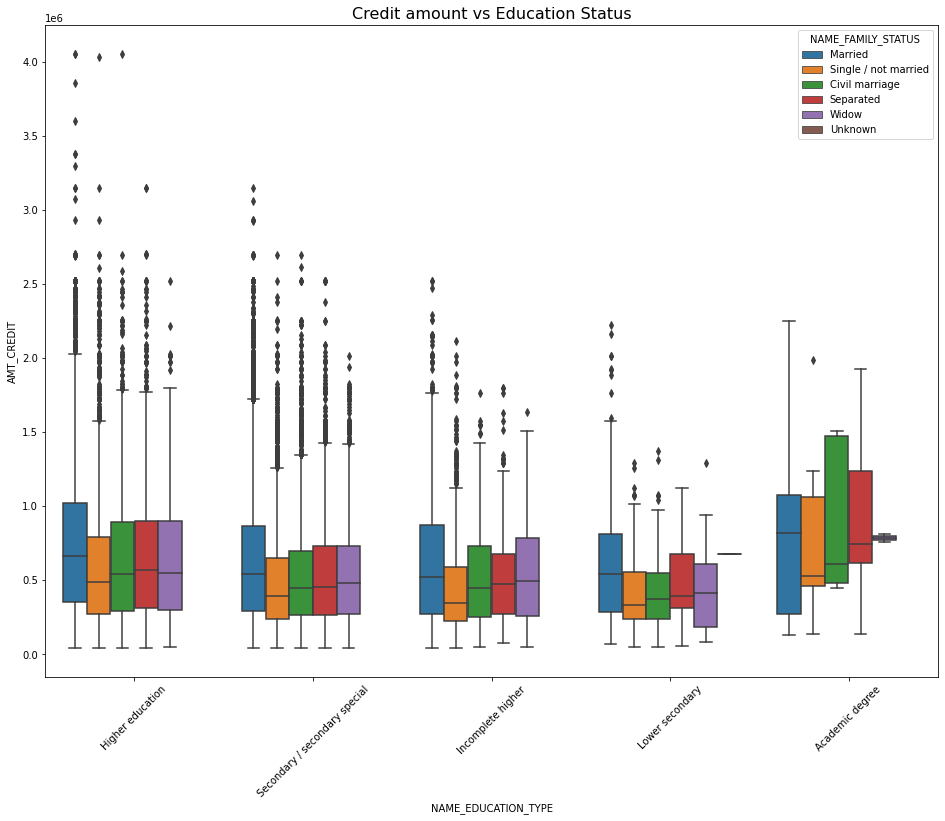

In [23]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' have more outliers. Civil marriage for Academic degree has the most of the credits in the third quartile.

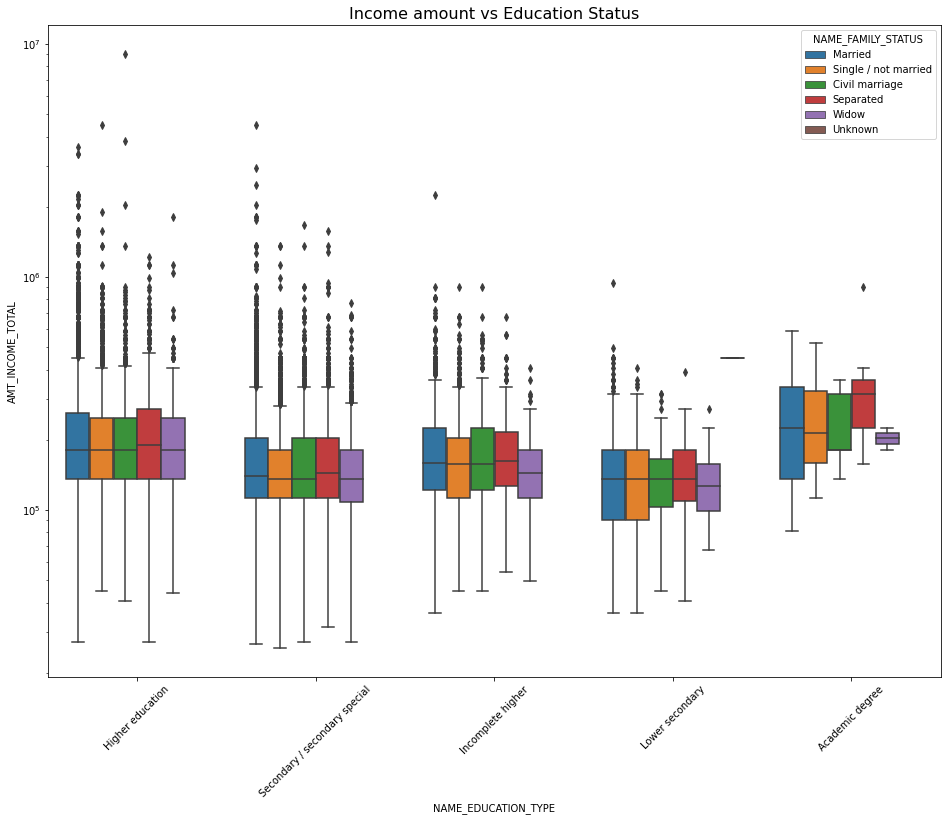

In [24]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

In Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers.
Less outliers for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status have less income amount than others.

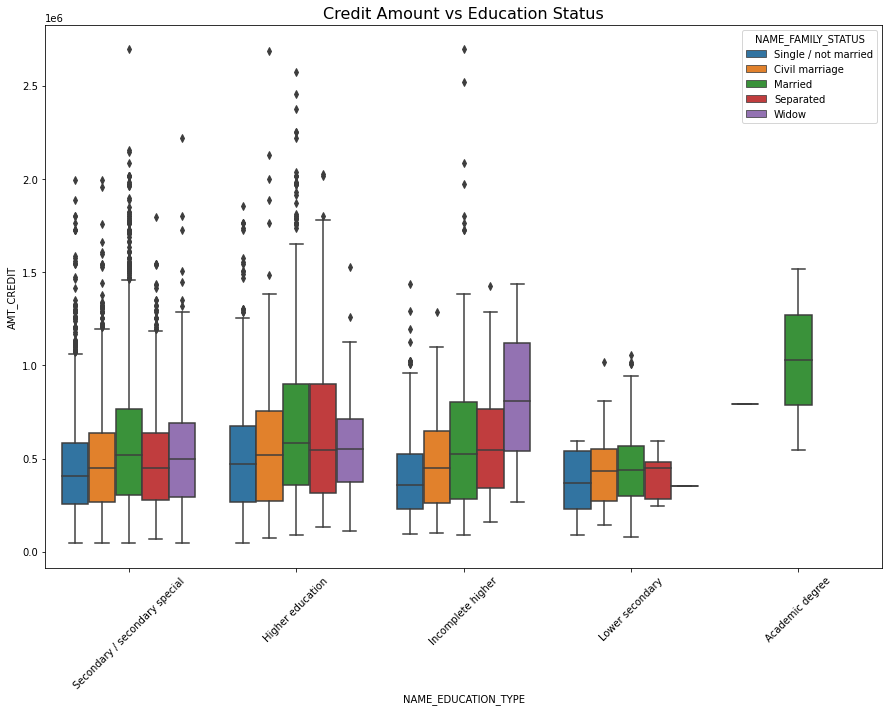

In [25]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Observations are Quite similar with Target 0
Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education have higher number of credits than others.
Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree have the most of the credits in the third quartile.

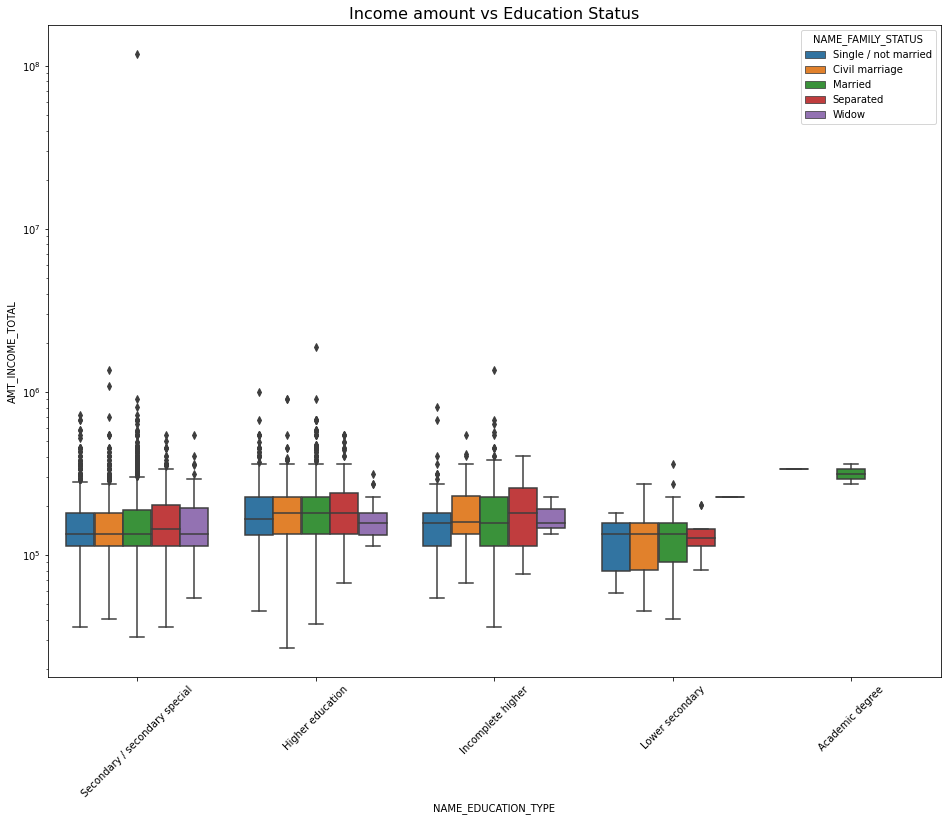

In [26]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

There is also some similarity with Target 0,
Education type 'Higher education' the income amount is mostly equal with family status.
Less outliers for Academic degree but there income amount is little higher that Higher education.
Lower secondary have less income amount than others.

In [27]:
# Top 10 correlated variables: target 0 dataaframe

corr = target0_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
649,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
184,AMT_GOODS_PRICE,AMT_CREDIT,0.99
680,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
464,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
557,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.82
185,AMT_GOODS_PRICE,AMT_ANNUITY,0.77
154,AMT_ANNUITY,AMT_CREDIT,0.76
433,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.46
526,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44
153,AMT_ANNUITY,AMT_INCOME_TOTAL,0.43


In [28]:
# Top 10 correlated variables: target 1 dataaframe

corr = target1_df.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
649,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
184,AMT_GOODS_PRICE,AMT_CREDIT,0.98
464,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.87
680,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
557,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.77
185,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
154,AMT_ANNUITY,AMT_CREDIT,0.75
433,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.49
526,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47
650,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.35


In [29]:
filename1 = "previous_application.csv"
num_lines = sum(1 for i in open(filename))
size = num_lines//2
random.seed(10)
skip_id = random.sample(range(1, num_lines), num_lines-size)
df_prev = pd.read_csv(filename1, skiprows = skip_id)
df_prev.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [30]:
NA_col_pre = column_wise_null_percentage(df_prev)
NA_col_pre = NA_col_pre[NA_col_pre>50]
df_prev = df_prev.drop(NA_col_pre.index, axis =1)

In [31]:
df_comb = pd.merge(left=df_app,right=df_prev,how='inner',on='SK_ID_CURR',suffixes='_x')

In [32]:
# Renaming the column names after merging from combined df

df_comb = df_comb.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
# Removing unwanted columns from cmbined df for analysis

df_comb.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

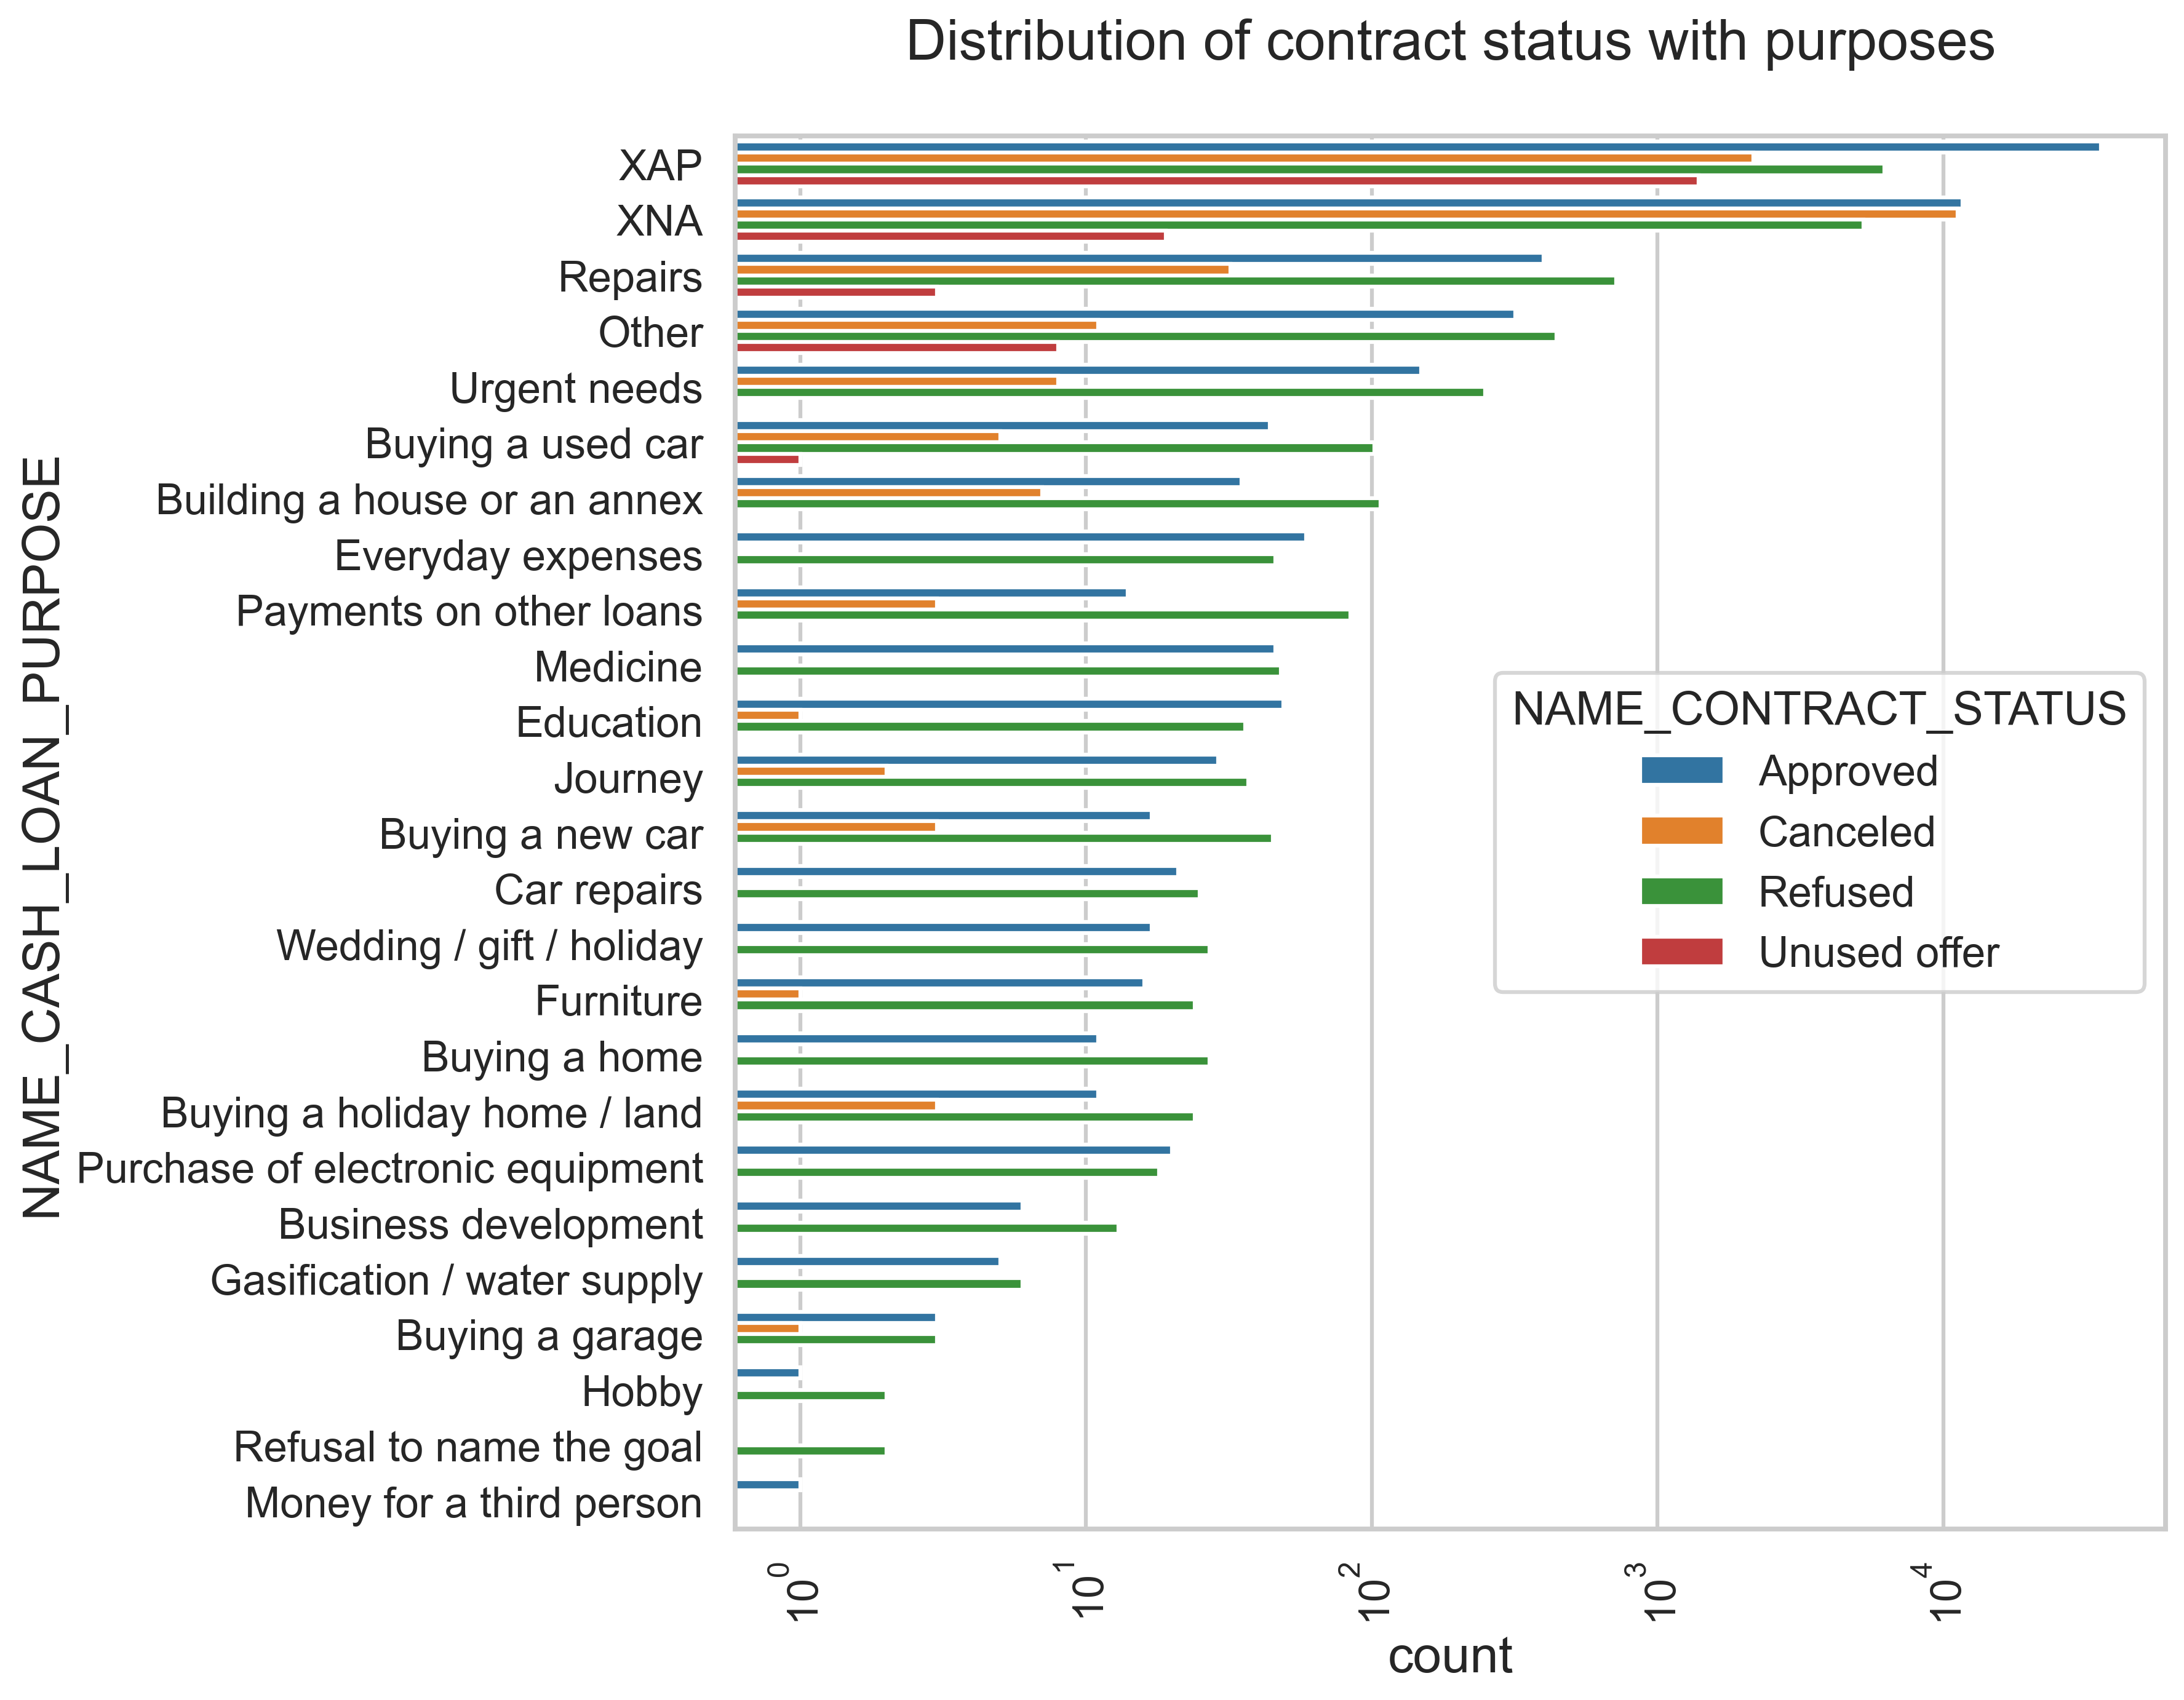

In [33]:
# Distribution of contract status in logarithmic scale
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = df_comb, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comb['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')

Most rejection of loans came from purpose 'repairs'. For education purposes we have equal number of approves and rejection Paying other loans and buying a new car has significant higher rejections than approvals.

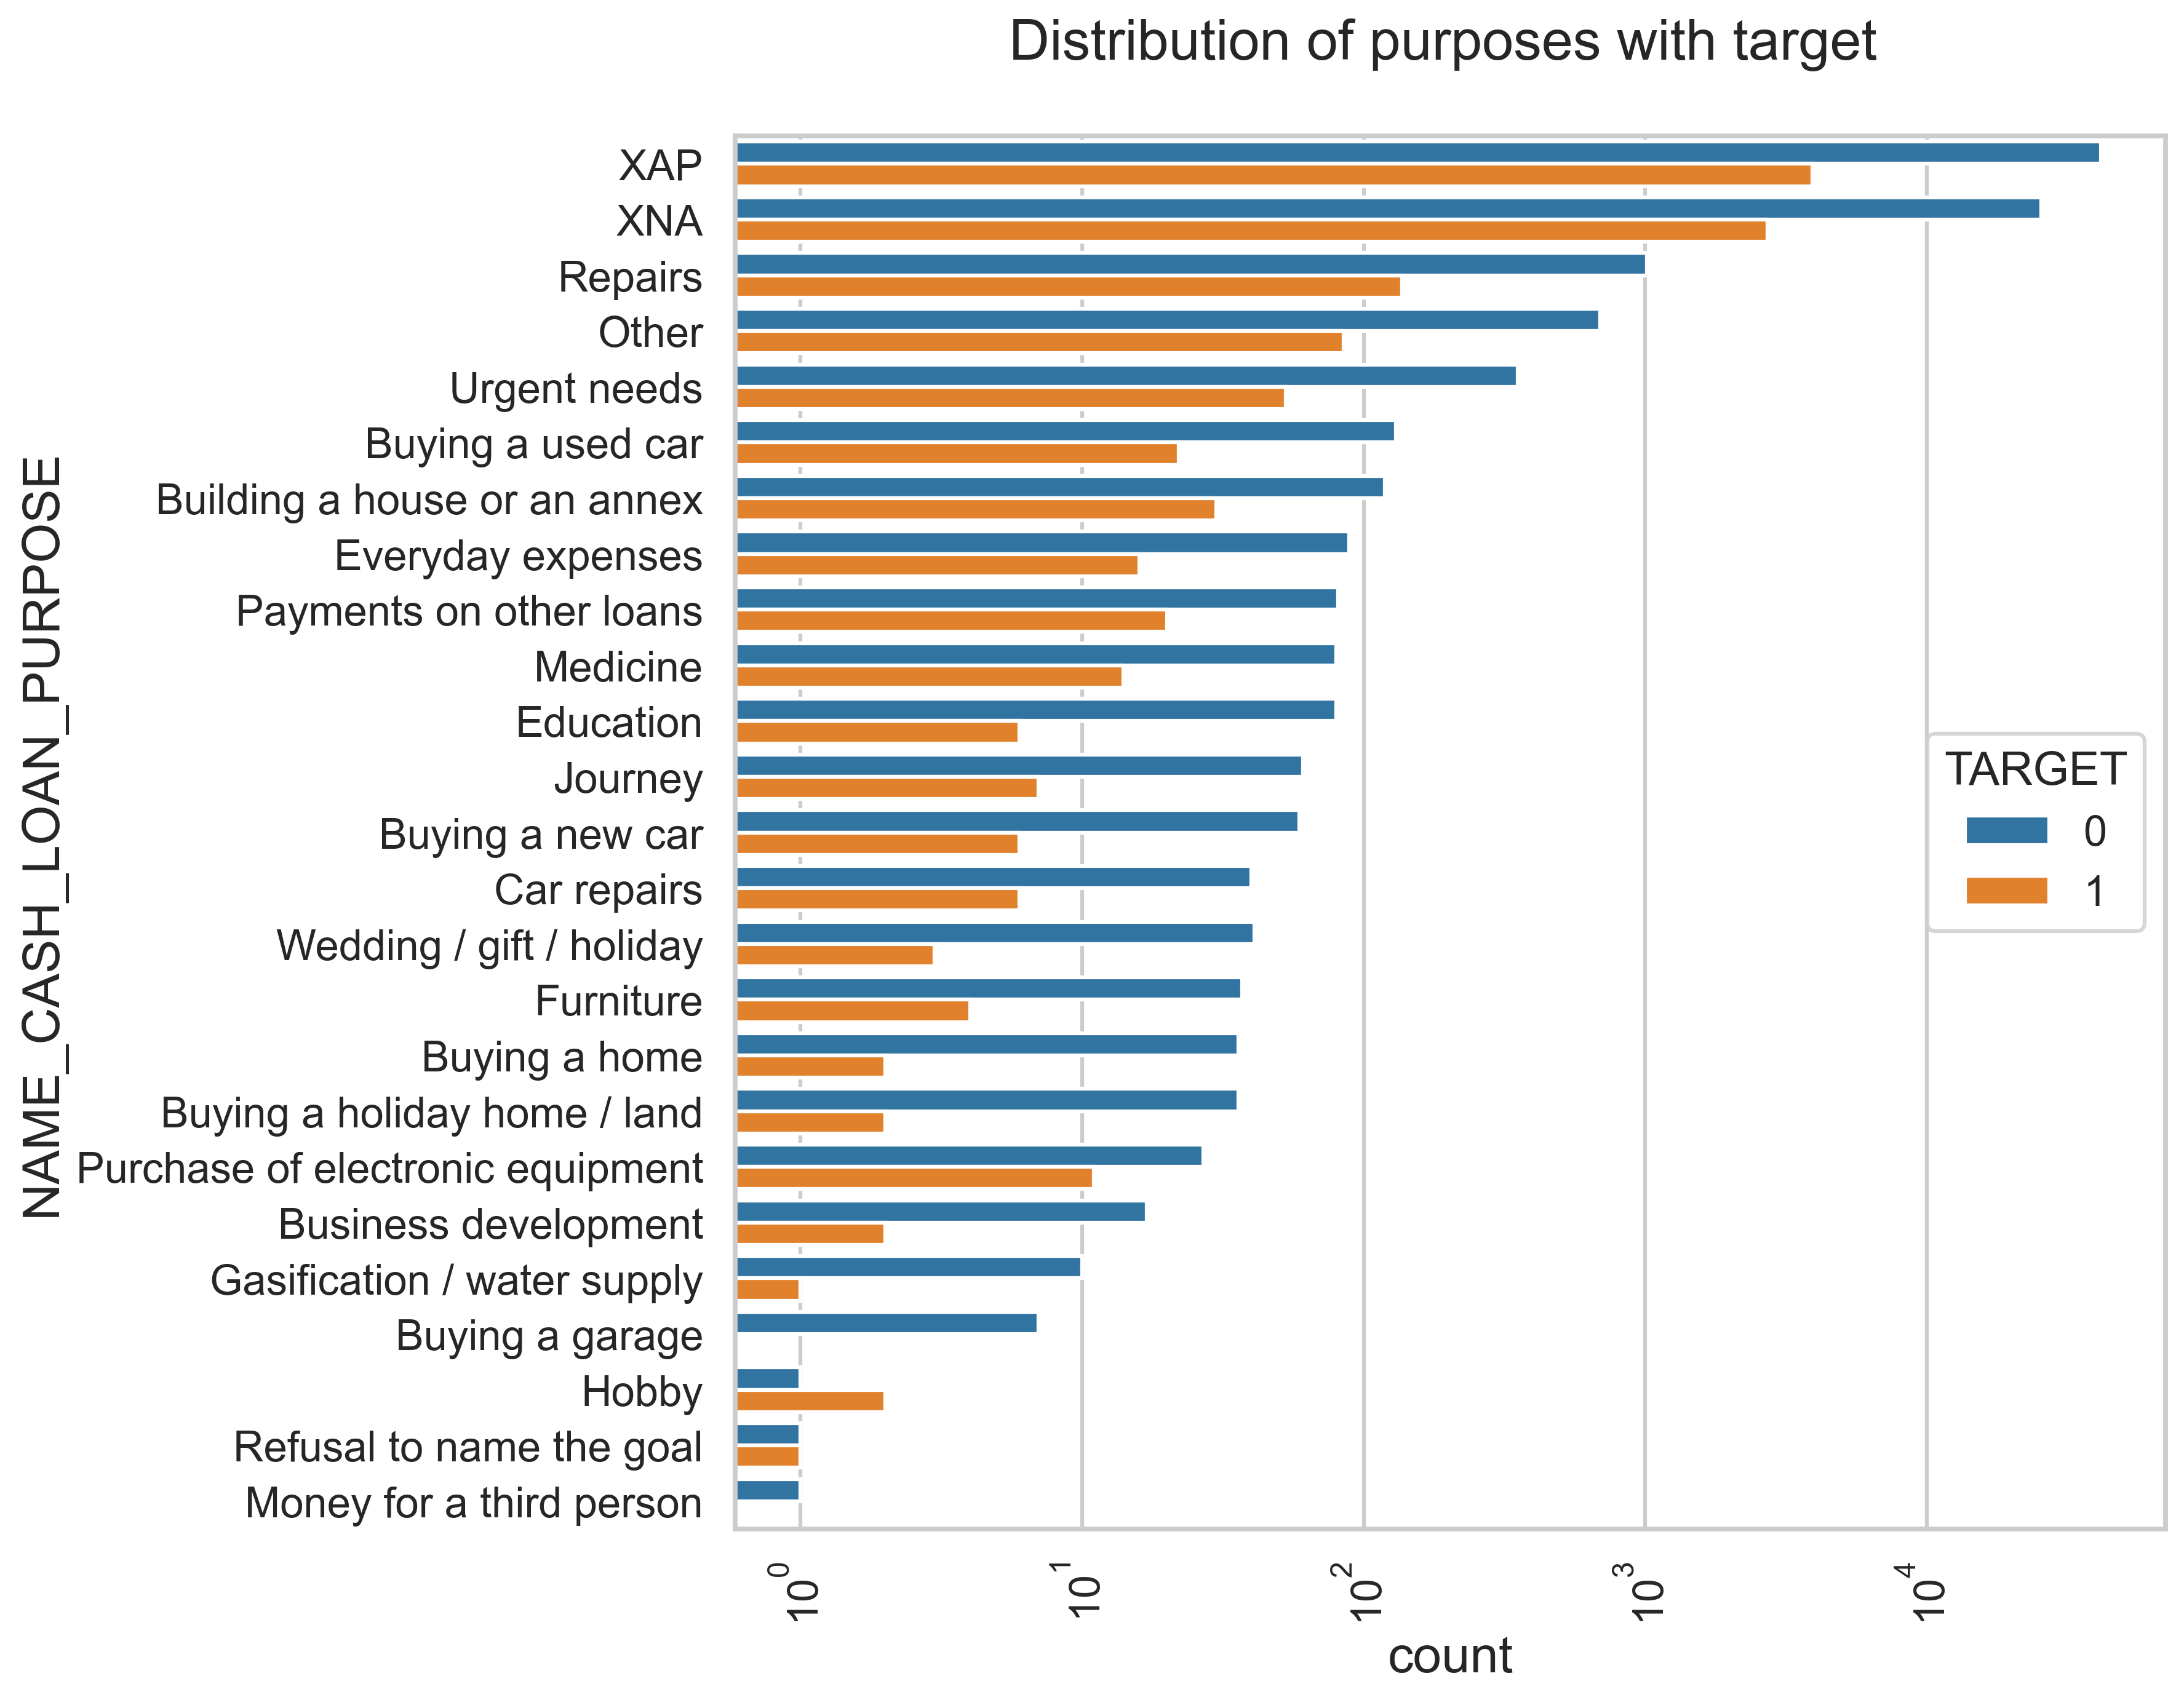

In [34]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10),dpi = 300)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = df_comb, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_comb['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

Loan purposes with 'Repairs' are facing more difficulites in payment on time. There are few places where loan payment is significantly higher. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

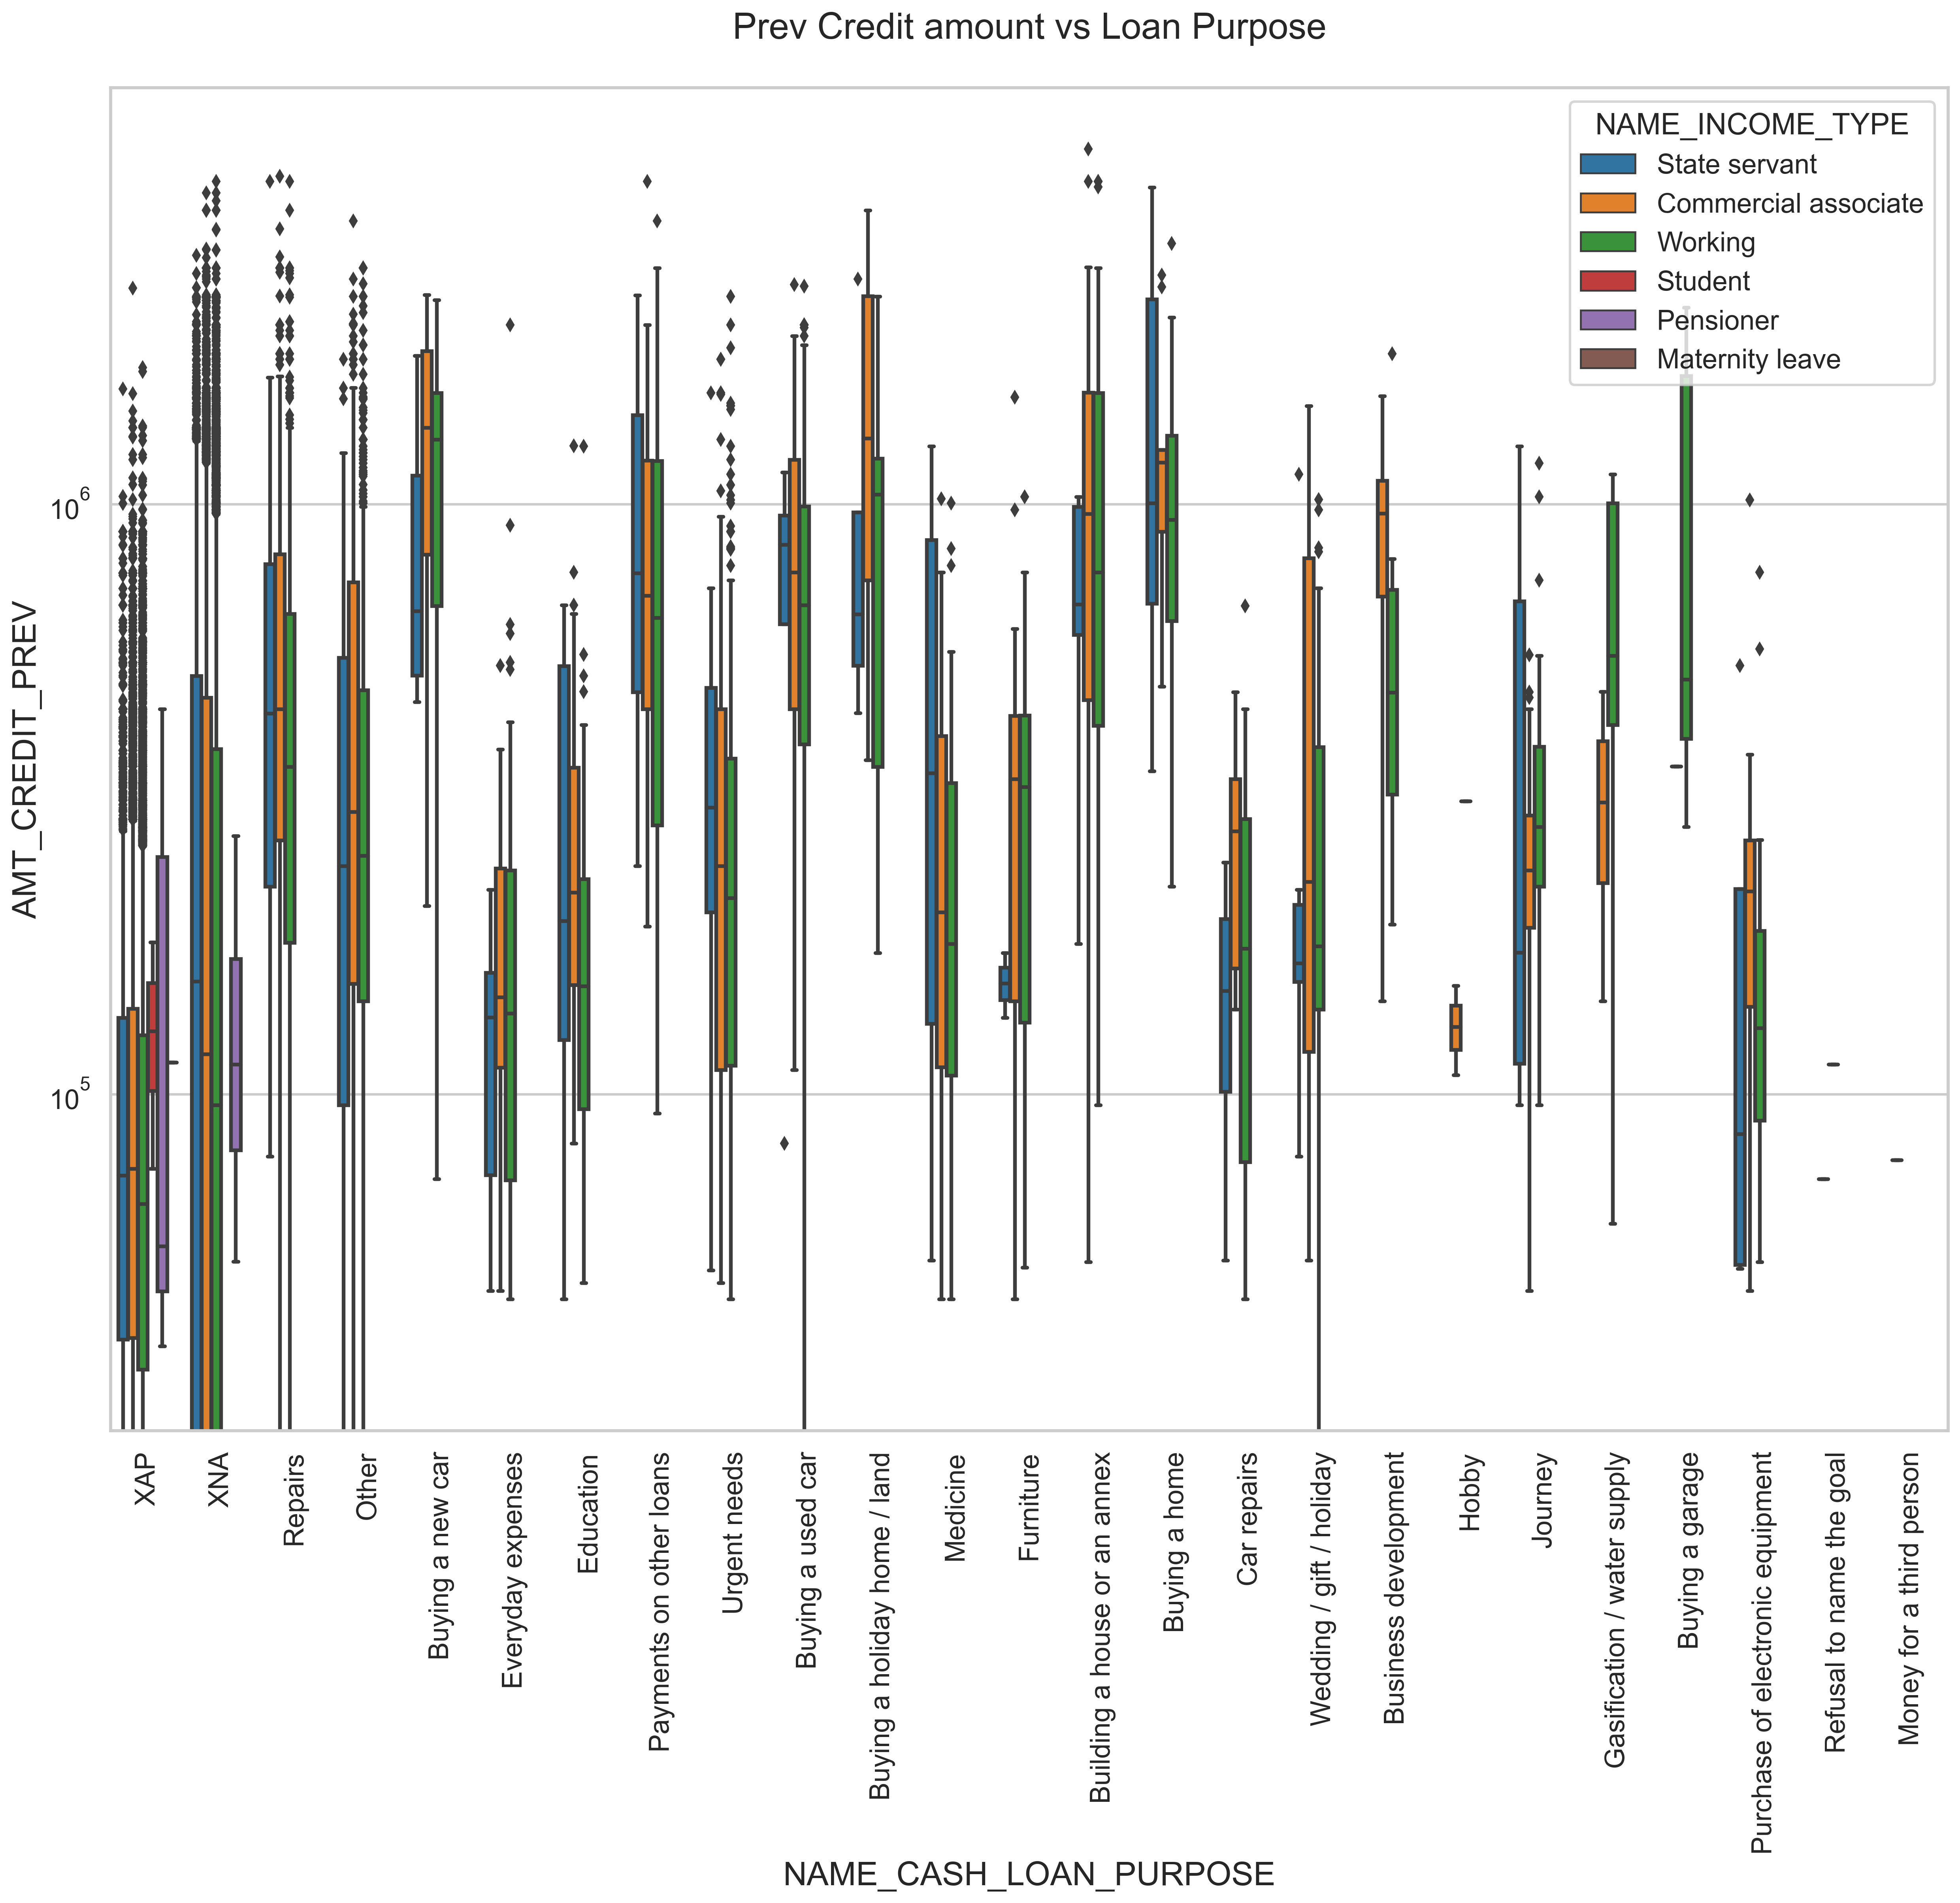

In [35]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,15),dpi = 300)
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =df_comb, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

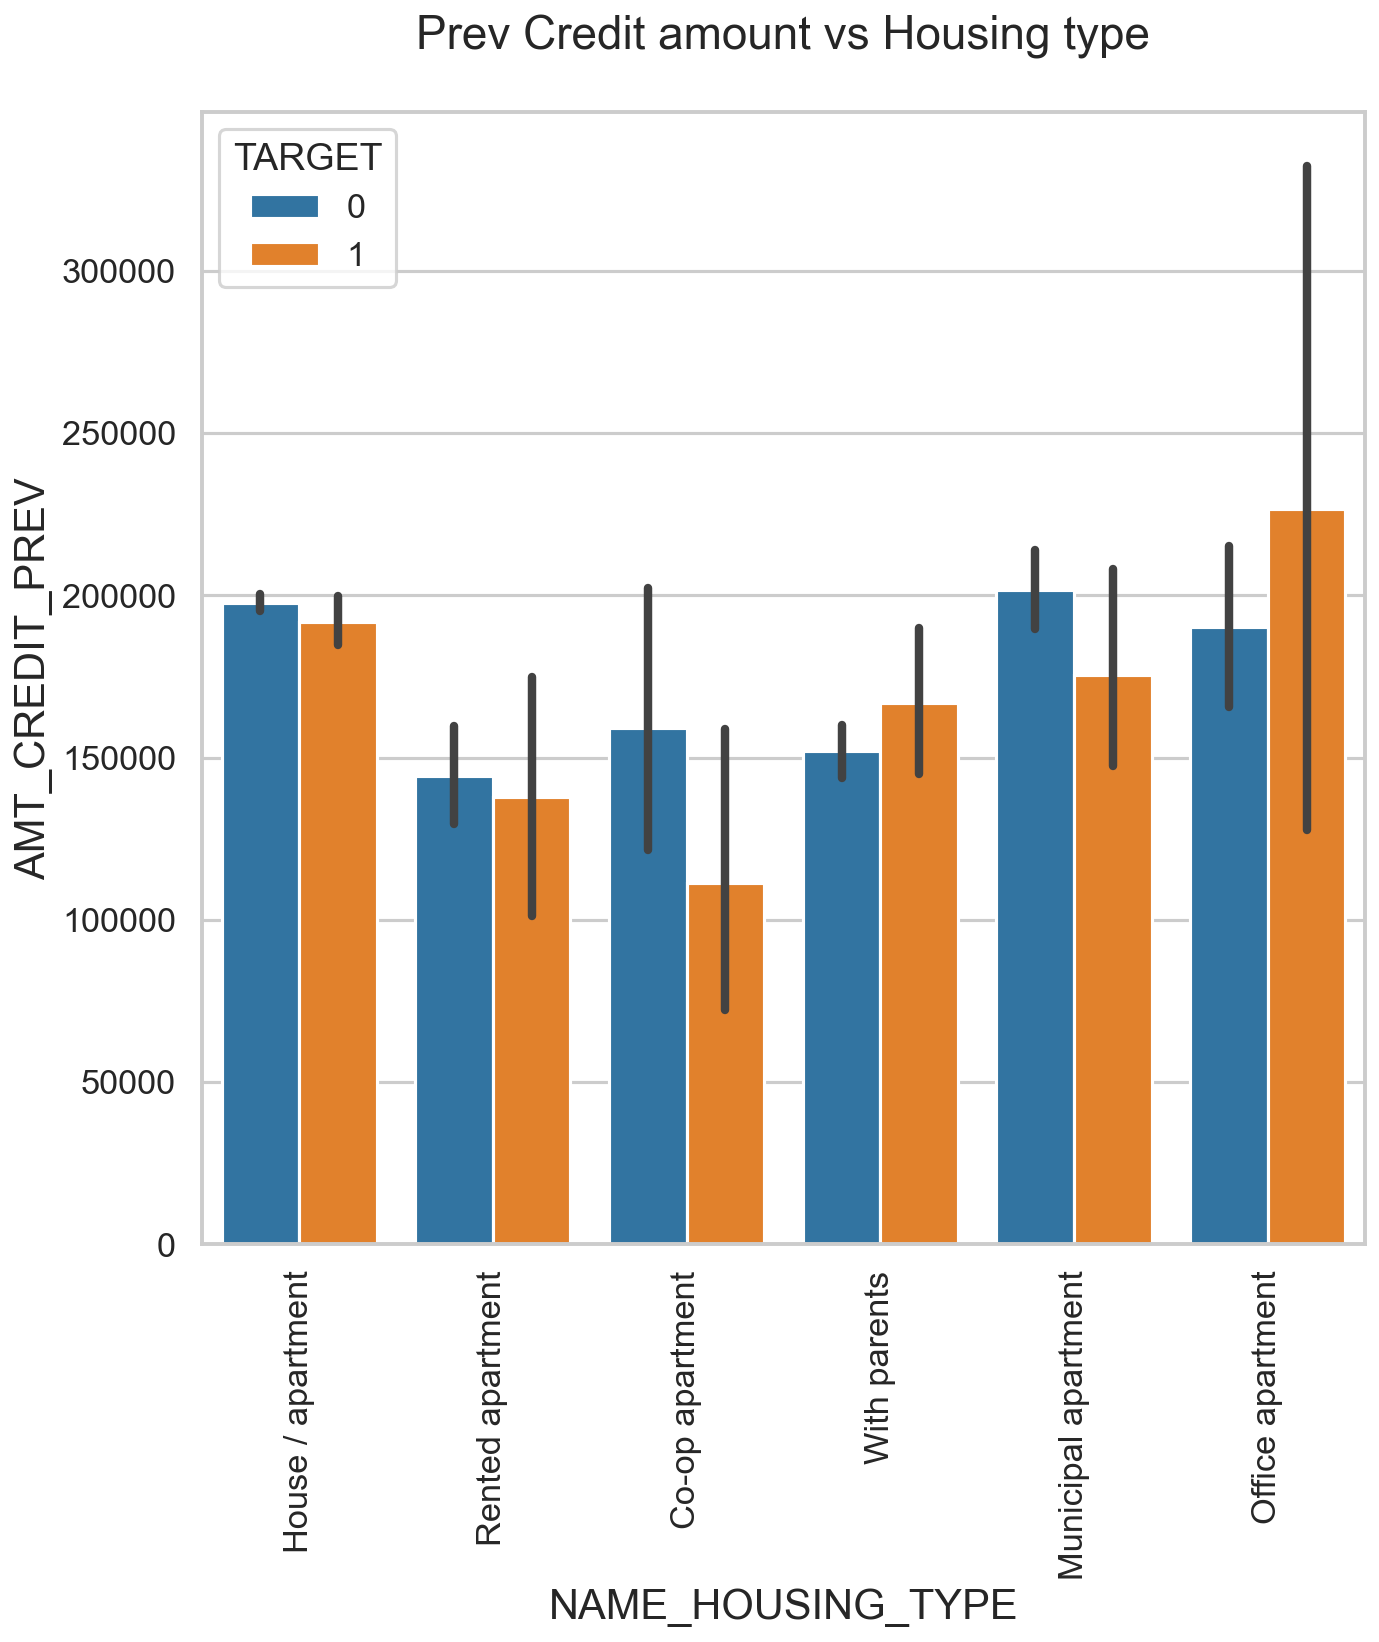

In [36]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(10,10),dpi = 150)
plt.xticks(rotation=90)
sns.barplot(data =df_comb, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment has higher credit of target 0 and co-op apartment has higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they have difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

6. Conclusion/Recomendation:
1. Banks should focus more on contract type 'Student' ,'pensioner' and 'Businessman' with housing type other than 'Co-op apartment' for successful payments.

2. Banks should focus less on income type 'Working' as they are having the most number of unsuccessful payments.

3. In loan purpose 'Repairs':

a. Although having higher number of rejections in loan purposes with 'Repairs' there are observed difficulties in payment on time.
b. There are few places where loan payment delay is significantly high.

4. Bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

5. Bank can focus mostly on housing type 'with parents' , 'House\apartment' and 'municipal apartment' for successful payments.